In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
marketing = pd.read_csv('marketing_workfile.csv')

In [3]:
marketing.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes


In [4]:
marketing.describe()

,Unnamed: 0,DoW,channel_code
count,10037.00000,1856.000000,1856.000000
mean,5018.00000,2.529634,2.631466
std,2897.57666,1.937900,1.211340
min,0.00000,0.000000,1.000000
25%,2509.00000,1.000000,2.000000
50%,5018.00000,2.000000,2.000000
75%,7527.00000,4.000000,3.000000
max,10036.00000,6.000000,5.000000


In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10037 non-null  int64  
 1   user_id              10037 non-null  object 
 2   date_served          10021 non-null  object 
 3   marketing_channel    10022 non-null  object 
 4   variant              10037 non-null  object 
 5   converted            10037 non-null  bool   
 6   language_displayed   10037 non-null  object 
 7   language_preferred   10037 non-null  object 
 8   age_group            10037 non-null  object 
 9   date_subscribed      1856 non-null   object 
 10  date_canceled        577 non-null    object 
 11  subscribing_channel  1856 non-null   object 
 12  is_retained          10037 non-null  bool   
 13  DoW                  1856 non-null   float64
 14  channel_code         1856 non-null   float64
 15  is_correct_lang      10037 non-null 

In [6]:
marketing['is_retained'].dtype

dtype('bool')

In [7]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')


In [8]:
#The date columns in the marketing DataFrame are being incorrectly read as objects. Changing them to datetime object
marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

Adding new columns

In [9]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)


# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'],'Yes','No')

Daily marketing reach by channel

In [10]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

In [11]:
# self check on  daily_users
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

Visualizing daily marketing reach

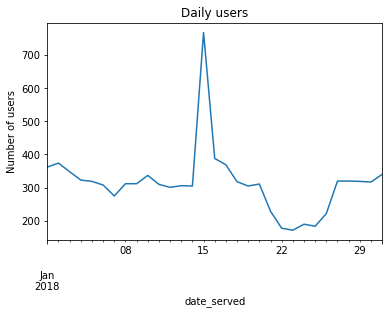

In [12]:
# Plot daily_subscribers
daily_users.plot()

plt.title('Daily users')
plt.ylabel('Number of users')
plt.show()


# there is a big spike around the time an email goes out

Calculating conversion rate

In [13]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

In [14]:
# Calculate the conversion rate
conversion_rate = subscribers/total
round(conversion_rate*100, 2), "%"

(14.09, '%')

# Is this a good conversion rate? This will depend heavily on the business. There is no particular number that all marketing teams are trying to reach. It helps to look at historical data to determine whether a conversion rate is what you would expect

Calculating retention rate

In [16]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing.converted == True].user_id.nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing.is_retained == True].user_id.nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers


Comparing language conversion rate (each language)

In [22]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed').user_id.nunique()

# Group by language_displayed and sum conversions
subscribers = marketing[marketing.converted== True].groupby('language_displayed').user_id.nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


Aggregating by date

In [23]:
# Group by date_served and count unique users
total = marketing.groupby('date_served').user_id.nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing.converted == True].groupby('date_served').user_id.nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


Visualize conversion rate by language

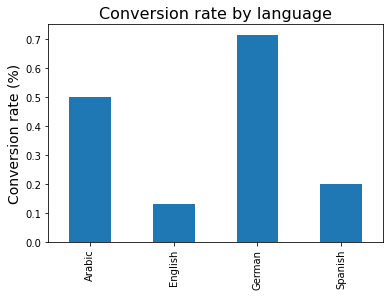

In [28]:

language_conversion_rate.plot(kind = 'bar')
plt.title('Conversion rate by language', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('', size = 14)

plt.show()

Creating daily conversion rate DataFrame
Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [29]:
# count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

Setting up our data to visualize daily conversion

In [30]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

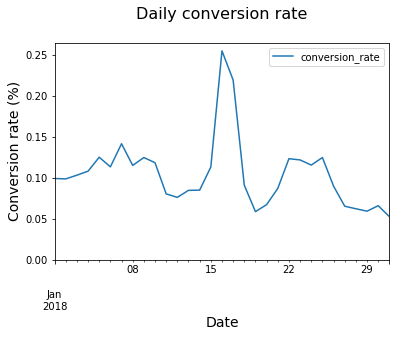

In [34]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)
# Set the y-axis to begin at 0
plt.ylim(0)
plt.show()

# The conversion rate is relatively steady except for one day in January

Marketing channels across age groups

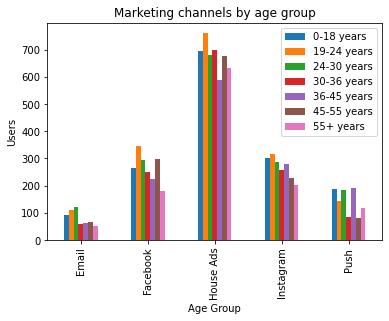

In [35]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

Grouping and counting by multiple columns

In [36]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
retention_total.head()

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64

In [37]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing.is_retained == True].groupby(['date_subscribed', 
                                                                   'subscribing_channel'])['user_id'].nunique()
retention_subs.head()

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64

Analyzing retention rates for the campaign

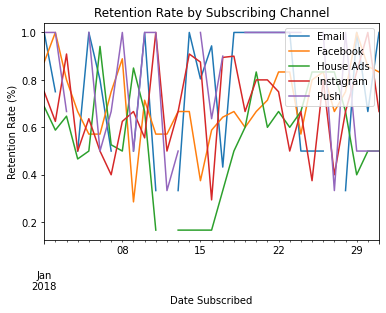

In [38]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(labels = retention_rate_df.columns.values, loc = 'upper right')
plt.show()

Building a conversion function


Automating conversion rate calcualtion from above code into a function which takes a dataframe and the columns to groupby

In [39]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe.converted == True].groupby(column_names).user_id.nunique()

    # Total number users
    column_total = dataframe.groupby(column_names).user_id.nunique() 
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


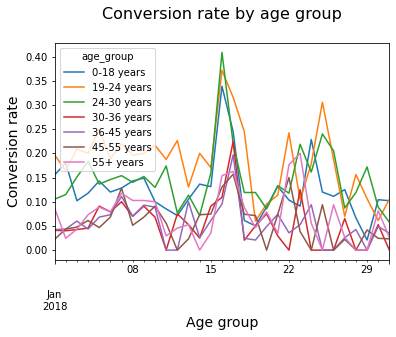

In [40]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

To get uncluttered individual graphs for analysis

In [41]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        plt.show()
        plt.clf()

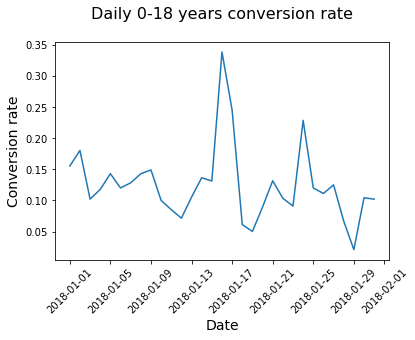

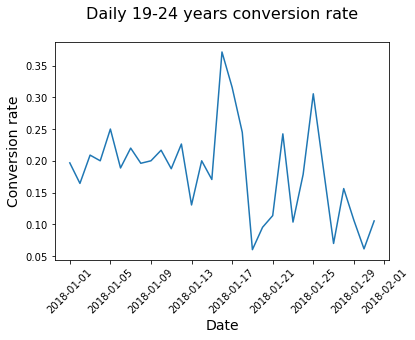

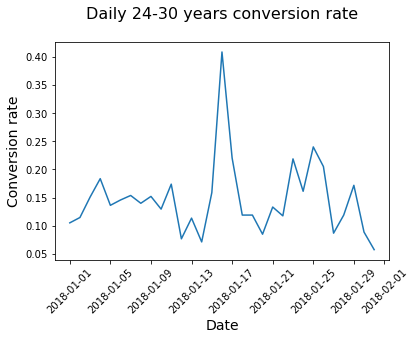

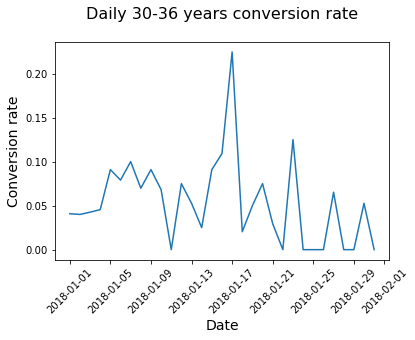

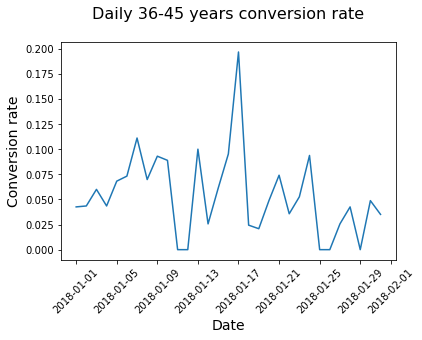

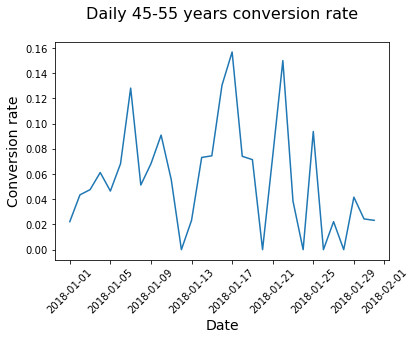

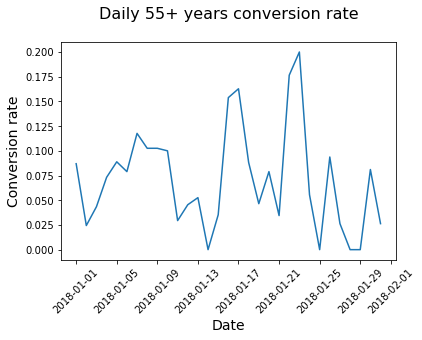

<Figure size 432x288 with 0 Axes>

In [42]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

##Gives a indivdual plot for all age groups since the unstacking was done at age_group level

House ads conversion rate

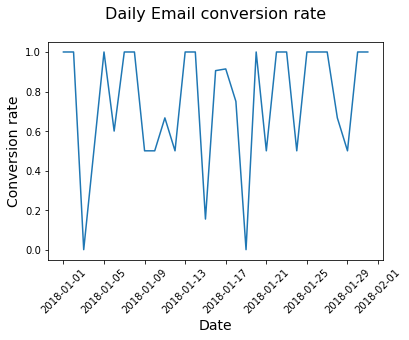

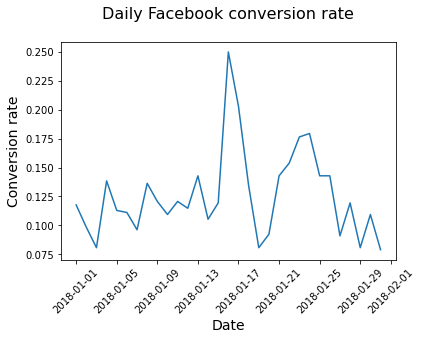

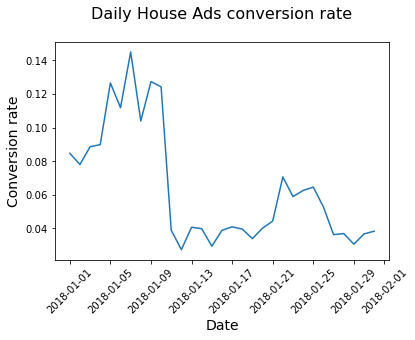

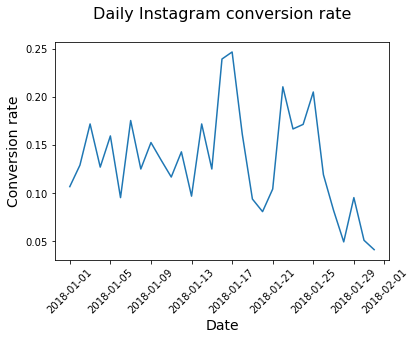

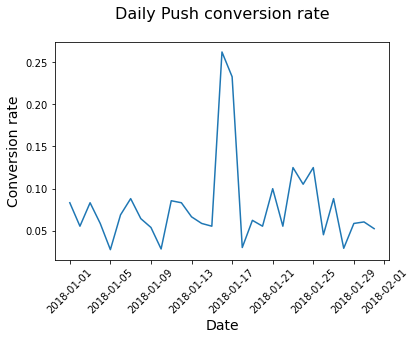

<Figure size 432x288 with 0 Axes>

In [43]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

Analyzing House ads conversion rate

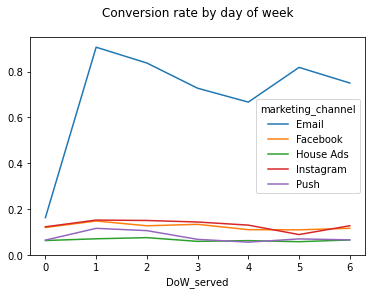

In [44]:
# Add day of week column to channel_marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

# email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday

House ads conversion by language

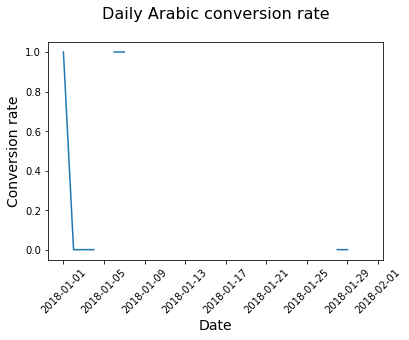

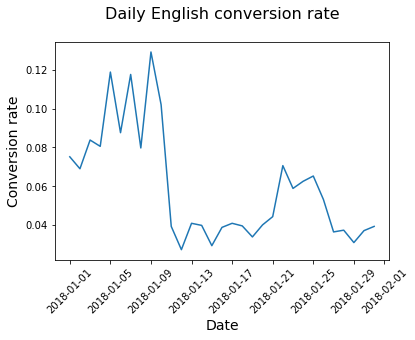

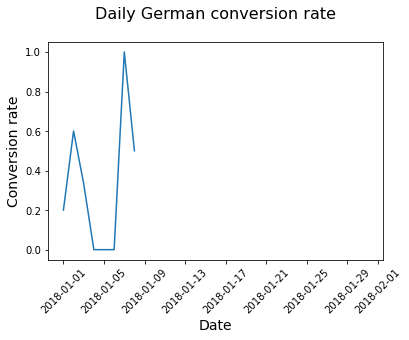

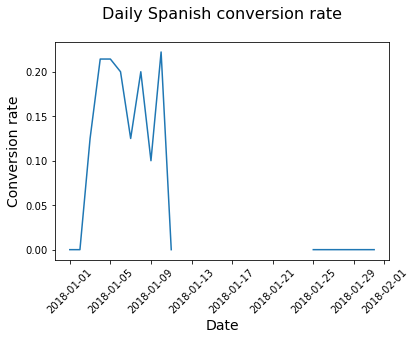

<Figure size 432x288 with 0 Axes>

In [45]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing.marketing_channel == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served',  'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

# As observed, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

In [46]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_preferred'] == house_ads['language_displayed'], 'Yes', 'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\kiril\AppData\Local\Temp/ipykernel_13492/1994365931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(house_ads['language_preferred'] == house_ads['language_displayed'], 'Yes', 'No')


In [47]:
#Confirming house ads error

In [49]:
#Calculating what percentage of users were not being served ads in the right language and plotting the results

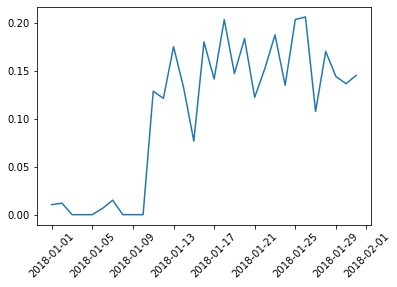

In [52]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['No']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()

# It is clear that house ads have been underperforming due to serving all ads in English rather than each user's preferred language

In [53]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])
print(lang_conv*100)
# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']
# This index helps us evaluate how well our marketing assets typically convert users for each lang compared to english.
print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

language_displayed
Arabic     50.000000
English     9.909281
German     44.444444
Spanish    16.666667
Name: user_id, dtype: float64
Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


# Now we  can assess what conversion rate should have been during the rest of the month

Analyzing user preferences

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

Next here we are calculating the total number of users and actual conversions each day

In [54]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
pd.set_option('precision', 0)
# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))
print(converted)

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01               2     171      5      11         2      13      1   
2018-01-02               3     200      5      10         0      14      3   
2018-01-03               2     179      3       8         0      15      1   
2018-01-04               2     149      2      14         0      12      0   
2018-01-05             NaN     143      1      14       NaN      17      0   
2018-01-06               3     136      2      11         3      12      0   
2018-01-07               2     117      2      10         2      14      2   
2018-01-08             NaN     138      6      10       NaN      11      3   
2018-01-09             NaN     147    NaN      10       NaN      19    NaN   
2018-01-10             NaN     147      4      18       NaN     

Build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language

In [55]:
# Create English conversion rate column for affected period
converted = converted.loc['2018-01-11':'2018-01-31']
converted['english_conv_rate'] = converted[('converted','English')]
print(converted.head())

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted[('user_id','German')]

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11               7     133      2      13         0       6      0   
2018-01-12               3     129      4      11         0       3      0   
2018-01-13               6     121      5      16         0       5      1   
2018-01-14               5     131      3      12         0       6      0   
2018-01-15               2     189      4      10         0       6      0   

                           english_conv_rate  
language_preferred Spanish                    
date_served                                   
2018-01-11               0                 6  
2018-01-12               1                 3  
2018-01-13               0                 5  
2018-01-14               0                 6  
2018-01-15               0                 6  

# how many subscribers are lost due to the language discrepancy?

In [56]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11': '2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted['converted', 'Spanish'].sum() +converted['converted', 'Arabic'].sum() + converted['converted', 'German'].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(int(lost_subs))

32
